<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phase-encoded-mapping-/-Traveling-wave" data-toc-modified-id="Phase-encoded-mapping-/-Traveling-wave-1">Phase-encoded mapping / Traveling wave</a></span></li><li><span><a href="#Create-simulated-dataset" data-toc-modified-id="Create-simulated-dataset-2">Create simulated dataset</a></span></li><li><span><a href="#Load-post-processed-simulated-data" data-toc-modified-id="Load-post-processed-simulated-data-3">Load post-processed simulated data</a></span></li><li><span><a href="#Visualize-our-data" data-toc-modified-id="Visualize-our-data-4">Visualize our data</a></span></li></ul></div>

# Phase-encoded mapping / Traveling wave

# Create simulated dataset

In [211]:
## Code for simulating the data: ##
from scipy.stats import gamma
from scipy import signal
np.random.seed(1)
num_voxels = 100
num_TRs = 15 * 10

gaussian_function = (gamma.pdf(np.arange(20),5) * gamma.pdf(np.arange(20),12)) / .2

eccentricities = np.tile(np.arange(15),10)
receptive_fields = np.linspace(0,15,num_voxels)

voxel_by_timeseries=np.full((num_voxels,num_TRs),np.nan)
for v,rec in enumerate(receptive_fields):
    for t,ecc in enumerate(eccentricities):
        voxel_by_timeseries[v,t] = 0
        if np.abs(rec-ecc) < 3:
            voxel_by_timeseries[v,t]+=1
        if np.abs(rec-ecc) < 1:
            voxel_by_timeseries[v,t]+=1
        
    noise = np.random.normal(0,.2,num_TRs)
    voxel_by_timeseries[v,:] = (voxel_by_timeseries[v,:] + noise) / np.max(voxel_by_timeseries[v,:])

np.save('voxel_by_timeseries.npy',voxel_by_timeseries)

# Load post-processed simulated data
Import our data. Look at how many subjects, trial conditions, and voxels we have to work with. 

Note that we follow Python conventions by numbering variables starting at 0 and not 1.

In [179]:
# general packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

# hemodynamic response function with max value at 1
hrf_function = (gamma.pdf(np.arange(20),5) - 0.2 * gamma.pdf(np.arange(20),12)) / .2

# # pull data from GitHub
# import requests, io
# for array in ['voxel_by_timeseries','eccentricities','receptive_fields']:
#     globals()['{}'.format(array)] = np.load(io.BytesIO(requests.get(
#         'http://paulscotti.github.io/FMRIPlayground/methods/retinotopy/{}.npy'.format(array)).content))

# overview of the data
num_subjects = 1
num_voxels = voxel_by_timeseries.shape[0] #100 voxels
num_TRs = voxel_by_timeseries.shape[1] #180 TRs

# Visualize our data

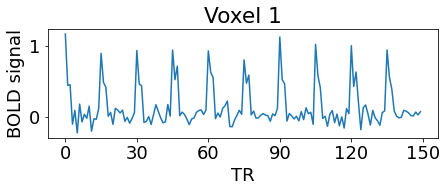

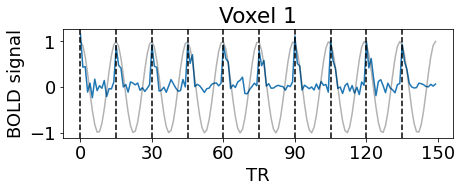

Correlation coefficient: 0.287


In [339]:
# change default plotting
plt.rcParams.update({'font.size': 18, 'figure.figsize': (7,2)})

plt.plot(voxel_by_timeseries[0,:])
plt.xticks(np.arange(0,num_TRs+1,30))
plt.xlabel("TR")
plt.ylabel("BOLD signal")
plt.title("Voxel 1")
plt.show()

plt.plot(voxel_by_timeseries[0,:])
plt.xticks(np.arange(0,num_TRs+1,30))
for p in np.arange(0,num_TRs,15):
    plt.axvline(p,c='k',ls='--')
plt.plot(np.cos(np.linspace(0, np.pi*20, num_TRs)), c='k', alpha=.3)
plt.xlabel("TR")
plt.ylabel("BOLD signal")
plt.title("Voxel 1")
plt.show()

print("Correlation coefficient: {:.3f}".format(np.corrcoef(voxel_by_timeseries[0,:],eccentricity_ts)[0][1]))

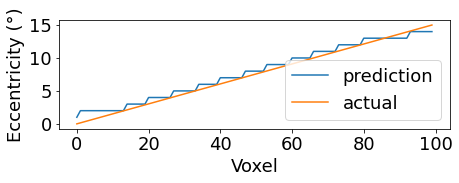

In [357]:
predicted_eccentricity = []
for v in range(num_voxels):
    rs = []
    for t in range(15):
        rs = np.append(rs, np.corrcoef(voxel_by_timeseries[v,:],np.roll(np.cos(np.linspace(0, np.pi*20, num_TRs)),t))[0][1])
    predicted_eccentricity = np.append(predicted_eccentricity, np.argmax(rs))

plt.plot(predicted_eccentricity, label='prediction')
plt.plot(receptive_fields, label='actual')
plt.xlabel("Voxel")
plt.ylabel("Eccentricity (°)")
plt.yticks(np.arange(0,16,5))
plt.legend()
plt.show()